In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from omnixai.data.tabular import Tabular
import sklearn.model_selection
import xgboost
from omnixai.preprocessing.tabular import TabularTransform
from omnixai.explainers.tabular import TabularExplainer
from omnixai.explainers.prediction import PredictionAnalyzer
from omnixai.visualization.dashboard import Dashboard
from omnixai.explainers.vision import VisionExplainer
import warnings
from pandas.errors import SettingWithCopyWarning

C:\Users\asens\anaconda3\envs\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Summary of Paper: OmniXAI: A Library for Explainable AI by Wenzhuo Yang, Hung Le, Tanmay Laud, Silvio Savarese, Steven C.H. Hoi, 1 Jun 2022 [1]
### 1. The paper I will be summarizing can be found here: https://arxiv.org/abs/2206.01612

**NOTE** The omniXAI has compatability issues with Python 3.12 or 3.11+, also one of the libraries hnswlib requires additional installation and Microsoft Visual C++ 14.0 or greater. To be running it needs to be in venv on Python 3.11 or 3.10.

## Explanation of terms
1. Explainable AI (XAI)- Explainable AI is used to describe an AI model, its expected impact and potential biases. It helps characterize model accuracy, fairness, transparency and outcomes in AI-powered decision making. Explainable AI is crucial for an organization in building trust and confidence when putting AI models into production. AI explainability also helps an organization adopt a responsible approach to AI development. [2]
2. Black box AI - is any artificial intelligence system whose inputs and operations aren't visible to the user or another interested party. A black box, in a general sense, is an impenetrable system. They arrive at conclusions or decisions without providing any explanations as to how they were reached. [3]
3. SHAP :(SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions (see papers for details and citations). [4]
4. LIME: Local interpretable model-agnostic explanations (LIME) is a method that fits a surrogate glassbox model around the decision space of any blackbox model's prediction.[5]
5. Grad-cam: Gradient-Weighted Class Activation Mapping (Grad-CAM) is a popular explainable artificial intelligence (xAI) technique used to understand convolutional neural network (CNN) models. [6]
6. MACE: CE is a a machine learning software for predicting many-body atomic interactions and generating force fields. It utilizes high r order equivariant message passing for fast and accurate predictions. [7]
7. Polyjuice: A general-purpose counterfactual generator [8]

## Summary
### The aim of this paper
This paper introduces OmniXAI (Omni eXplainable AI), an open-source Python library aimed at simplifying explainable AI (XAI) for data scientists, machine learning (ML) researchers, and practitioners. OmniXAI provides a unified interface for a comprehensive set of explanation techniques, supporting multiple data types (e.g., tabular data, images, text, and time-series), ML models (including traditional Scikit-learn models and deep learning models in PyTorch and TensorFlow), and explanation methods (e.g., feature attribution, counterfactual analysis, gradient-based methods). The library is designed to address the challenges of understanding and interpreting ML decisions by integrating explainability tools into various stages of the ML workflow, such as data exploration, feature engineering, model development, evaluation, and decision-making. The paper highlights OmniXAI's interface, which allows users to generate explanations with minimal code and provides a GUI dashboard for visualizing explanations. Through its design principles, system architecture, and diverse use cases, this paper demonstrates how OmniXAI enables effective and practical explainability across different types of ML tasks and data.

### Introductory problem statement 
The library is designed to address the challenges posed by the lack of explainability in machine learning (ML) systems, particularly in critical fields such as healthcare, finance, and education. These domains require transparency and trustworthiness, but many advanced ML models, particularly deep learning, are often perceived as black boxes, hindering their adoption. Explainable AI (XAI) aims to solve this issue by providing insights into how AI systems make decisions, improving their transparency and reliability.

### How does the library face the problem stated
OmniXAI provides a comprehensive set of tools to enhance the explainability of machine learning systems at every stage of the development workflow. It supports data exploration by analyzing feature correlations and addressing data imbalances, helping developers identify and mitigate biases. During feature engineering, it identifies important features and their relationships with target variables, facilitating data preprocessing. In the model development and evaluation stages, it offers methods such as feature attribution, counterfactual explanations, and gradient-based techniques to analyze and debug model behavior. Post-deployment, OmniXAI continues to provide explanations for individual predictions, aiding domain experts in interpreting and understanding model outputs.

The library includes both global and local explanation methods. Global methods, such as partial dependence plots and sensitivity analysis, provide insights into overall model behavior, while local techniques like SHAP, LIME, and counterfactuals focus on specific predictions. It supports a range of approaches, from model-agnostic to model-specific techniques like Grad-CAM for images and contrastive explanations. Furthermore, OmniXAI is compatible with diverse data types, including tabular data, images, text, and time-series tasks.

OmniXAI’s design focuses on usability, offering features that require minimal coding effort and providing a visualization dashboard for comparing interpretability methods. Its broad functionality and compatibility make it a versatile tool for understanding and interpreting machine learning models across various tasks and data types.

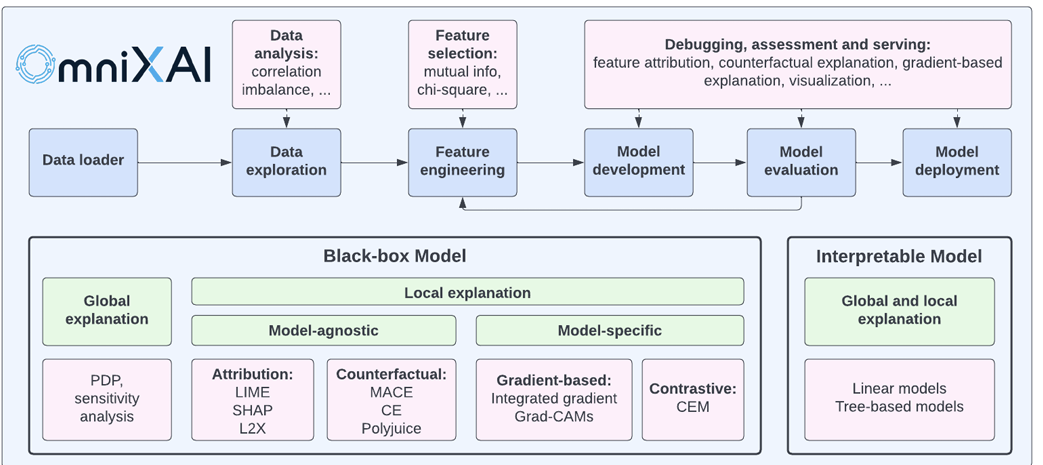  [1]

### What attributes does the library have

OmniXAI offers a comprehensive range of explainable AI (XAI) capabilities to address the challenges of understanding machine learning models. It supports feature analysis, feature selection, and data exploration to identify correlations, imbalances, and important features. The library is compatible with popular machine learning frameworks like PyTorch, TensorFlow, and scikit-learn and includes numerous explanation methods for analyzing models, such as feature attribution (e.g., SHAP, LIME), counterfactual explanations, and gradient-based methods like Integrated Gradients and Grad-CAM. These tools cater to various data types, including tabular, image, text, and time-series data.

For tabular data, OmniXAI supports global explanation methods like partial dependence plots (PDP) and sensitivity analysis, as well as counterfactual explanations such as MACE, which handle both continuous and categorical features. For image data, it provides Grad-CAM, Grad-CAM++, contrastive explanations (CEM), and counterfactuals to analyze deep learning models. Text data is supported with explanations like LIME, SHAP, and a counterfactual method using Polyjuice for classification and QA tasks. For time-series data, OmniXAI offers SHAP-based explanations and the MACE counterfactual method for anomaly detection and forecasting.

The library emphasizes usability with minimal coding requirements, easy extensibility for developers to add new algorithms, and a GUI dashboard for visualization and comparison of interpretability methods. Its unified interface streamlines generating explanations for both model-agnostic and model-specific approaches, making it a robust toolkit for understanding machine learning systems across diverse domains.

## The design of the library

The OmniXAI library is designed to offer a unified and straightforward interface for generating and visualizing explanations for machine learning models. The library aims to streamline the process of applying multiple explanation methods, visualizing their results, and extending the framework to accommodate new explanation techniques. It achieves this through five core components:

Data Classes (omnixai.data): This package provides data representations for different types of input, such as tabular data, images, text, and time-series. These classes serve as inputs to various explainers and can be easily created using constructors that accept numpy arrays, pandas dataframes, images, or text strings.

Preprocessing Modules (omnixai.preprocessing): These modules handle data preprocessing tasks, including one-hot and ordinal encoding for categorical data, normalization and scaling for continuous features, resizing and normalization for images, and TF-IDF transformations for text data. This ensures data is formatted appropriately for the explainers and models.

Explanation Methods (omnixai.explainers): This package contains all supported explanation methods, categorized into groups based on the data type and use case:

Data Exploration: Includes tools like feature correlation analysis and feature selection.
Tabular Data: Supports methods such as PDP, LIME, SHAP, and counterfactual explanations (e.g., MACE).
Vision Tasks: Includes Grad-CAM, integrated gradients, contrastive explanations, and counterfactual methods.
NLP Tasks: Methods such as LIME and integrated gradients are provided for text analysis. Explanation methods are further divided into model-agnostic (requiring only predictions), model-specific (requiring model details), and counterfactual methods.
Explanation Results (omnixai.explanations): This package stores and manages the results of explanation methods, including classes like FeatureImportance. It also provides visualization functionalities, such as plot for Matplotlib, plotly_plot for Plotly, and ipython_plot for Jupyter notebooks.

Visualization Tools (omnixai.visualization): The library includes a Plotly Dash-based dashboard for interactive visualization of global and local explanations. This feature allows users to compare multiple explanation methods and analyze results conveniently.

The architecture of OmniXAI revolves around the AutoExplainerBase class, which acts as a factory for creating explainers such as TabularExplainer, VisionExplainer, NLPExplainer, and TimeseriesExplainer. Users need to specify key parameters like the explainer names (e.g., SHAP, Grad-CAM), the machine learning model, preprocessing functions, and optional post-processing steps. The library automatically determines whether the chosen explainer is model-agnostic or model-specific and whether it produces local or global explanations.

Generated explanations are stored in classes derived from ExplanationBase, which offer visualization methods. Users can visualize individual explanations using various plotting methods or aggregate and display all explanations through the dashboard. This architecture simplifies the explanation process while maintaining flexibility and extensibility for different machine learning tasks.

## Explanations supported by the library
OmniXAI supports three main categories of explanation methods: model-agnostic, model-specific, and counterfactual explanations, each tailored to provide insights into machine learning models' behavior.

1. Model-agnostic Explanation
Model-agnostic methods explain the decisions of black-box models without requiring detailed knowledge of the model's structure. These include data analysis techniques like feature correlation analysis, as well as popular methods such as LIME, SHAP, L2X (for local explanations), and Partial Dependence Plots (PDP) and sensitivity analysis (for global explanations). These methods can be applied to a wide range of models, making them versatile.

2. Model-specific Explanation
Model-specific methods require access to the model's structure and functionality, such as gradients or decision paths. These include gradient-based techniques like integrated gradients (IG) and Grad-CAM, which rely on computing gradients of model outputs with respect to inputs or intermediate layers. Other techniques like the Contrastive Explanation Method (CEM) focus on identifying pertinent positives and negatives via optimization. These methods are particularly suited for neural networks implemented in PyTorch or TensorFlow. However, CEM currently supports only differentiable models and may be extended to support gradient estimation in the future.

3. Counterfactual Explanation
Counterfactual explanations provide insights by generating minimally altered examples that change the model's prediction. These methods help interpret a decision and offer guidance on altering future outcomes. OmniXAI includes the MACE method for tabular and time-series data, a model-agnostic framework that efficiently handles high-dimensional feature spaces. MACE solves an optimization problem to identify counterfactual instances with minimal changes to input features. For text data, the pretrained "Polyjuice" model is used to generate counterfactual examples for tasks like classification and question answering, ranking these examples based on changes in predicted labels and their similarity to the original text.

These explanation methods collectively cater to a wide variety of data types and models, ensuring flexibility and comprehensive model interpretability.

## Experiments with omniXAI

OmniXAI's capabilities are demonstrated through four experiments across different data types. 
- For tabular data, the library is applied to an income prediction task using the Adult dataset and an XGBoost classifier. Explanation methods such as LIME, SHAP, MACE, and PDP are used to provide insights into feature contributions, explore counterfactual scenarios, and identify biases in the dataset.
- For image classification, a pretrained ResNet model on ImageNet is explained using Grad-CAM, integrated gradients, and LIME. These methods highlight regions in the images influencing the predicted labels, offering interpretability at different neural network layers.
- In NLP tasks, such as sentiment classification, OmniXAI uses LIME, integrated gradients, and counterfactual explanations to analyze the importance of words like “great” in influencing predictions and explores how altering words can shift model outcomes.
- For time-series anomaly detection, SHAP and MACE are used to identify significant timestamps contributing to anomaly detection and propose counterfactual scenarios where adjustments in values prevent the anomaly. These experiments collectively showcase OmniXAI's ability to provide clear, actionable explanations across various machine learning tasks and data modalities.

## Conclusion, responsible use and risks
OmniXAI enhances AI transparency and trust by explaining model decisions and addressing issues like data shifts and biases. It helps developers identify and resolve model failures, improving performance and fostering confidence in AI systems. However, misuse can lead to negative impacts, such as unethical applications or privacy violations. Responsible use, including employing multiple explainers like SHAP and MACE, is crucial to mitigate risks and maximize benefits, though detecting all biases remains a challenge for future improvements.

## Reproducing the experiment (Tabular data)

#### Here I will reproduce the tabular data experiment using omniXAI, as it has the data source and I can reproduce it. (Code snippets are included, so I am using the code from the paper or from the PiPy website of omniXAI which is the same as the paper aka 'documentation')
**NOTE** omniXAI is still under development and it's not compatible with every version of python or C++ VS and the use of venv is neccesary and makes the process slower and tough, making reproduction hard and really time and computationally extensive.

1. Let's prepare the dataset for use in machine learning explanations.
2. First we define the feature names of the dataset and load the data from a file (adult.data) into a pandas DataFrame with the specified column names. Then, we create a Tabular instance, specifying which columns are categorical and identifying the target column (label) for prediction. Finally, we print a preview of the Tabular data.

In [20]:
# Define feature names for the dataset
feature_names = [
    "Age", "Workclass", "fnlwgt", "Education",
    "Education-Num", "Marital Status", "Occupation",
    "Relationship", "Race", "Sex", "Capital Gain",
    "Capital Loss", "Hours per week", "Country", "label"
]

# Load the dataset
df = pd.DataFrame(
    np.genfromtxt('adult.data', delimiter=', ', dtype=str), 
    columns=feature_names
)

# Create a Tabular instance
tabular_data = Tabular(
    df,
    categorical_columns=[feature_names[i] for i in [1, 3, 5, 6, 7, 8, 9, 13]],  # Categorical columns
    target_column="label"  # Target column
)

# Display a preview of the tabular data
print(tabular_data)

      Age         Workclass  fnlwgt   Education Education-Num  \
0      39         State-gov   77516   Bachelors            13   
1      50  Self-emp-not-inc   83311   Bachelors            13   
2      38           Private  215646     HS-grad             9   
3      53           Private  234721        11th             7   
4      28           Private  338409   Bachelors            13   
...    ..               ...     ...         ...           ...   
32556  27           Private  257302  Assoc-acdm            12   
32557  40           Private  154374     HS-grad             9   
32558  58           Private  151910     HS-grad             9   
32559  22           Private  201490     HS-grad             9   
32560  52      Self-emp-inc  287927     HS-grad             9   

           Marital Status         Occupation   Relationship   Race     Sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  Wh

3. Here we can see the dataframe
4. Now let's process the dataset for machine learning. We begin by applying a transformer (TabularTransform) to encode and prepare the tabular data into a numerical format for model training, while extracting class names. Then we split the data into training and testing sets, separating features from labels. We train an XGBoost classifier on the training data, and finally, the transformed datasets will be reverted back to their original Tabular format for further use or analysis.

In [23]:
# Step 1: Data preprocessing
transformer = TabularTransform().fit(tabular_data)  # Fit the transformer on the Tabular data
class_names = transformer.class_names  # Extract class names
x = transformer.transform(tabular_data)  # Transform Tabular data to numpy array
print(f"Transformed data shape: {x.shape}")

# Step 2: Split into training and test datasets
train, test, train_labels, test_labels = sklearn.model_selection.train_test_split(
    x[:, :-1],  # All features except the label
    x[:, -1],   # Labels (last column)
    train_size=0.80,
    random_state=42
)
print(f"Training data shape: {train.shape}")
print(f"Test data shape: {test.shape}")

# Step 3: Train an XGBoost model
model = xgboost.XGBClassifier(n_estimators=300, max_depth=5, random_state=42)
model.fit(train, train_labels)

# Step 4: Convert the transformed data back to Tabular instances
train_data = transformer.invert(train)
test_data = transformer.invert(test)

print("Training complete. The transformed data has been inverted back to Tabular instances.")


Transformed data shape: (32561, 109)
Training data shape: (26048, 108)
Test data shape: (6513, 108)
Training complete. The transformed data has been inverted back to Tabular instances.


5. As it can be seen the training is complete and the data is split and transformed.

6. I will add an ignore for filterwarnings that will be used to suppress FutureWarning messages in Python.

In [27]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [29]:
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

7. Now let's set up an explainability workflow for a machine learning classification task. First we initialize a TabularExplainer with various explanation methods (e.g., LIME, SHAP, PDP) to analyze both individual predictions and overall model behavior. Then, we select test instances and generate local and global explanations. A PredictionAnalyzer is used to assess the model's predictions, and a dashboard is configured to visualize these insights, enabling interactive exploration of the model's behavior and performance.

In [32]:
# Initialize TabularExplainer
explainer = TabularExplainer(
    explainers=["lime", "shap", "mace", "pdp", "ale"],  # Methods for explainability
    mode="classification",                             # Classification task
    data=train_data,                                   # Training data as Tabular instance
    model=model,                                       # The trained model
    preprocess=lambda z: transformer.transform(z),     # Preprocess features for the model
    params={
        "mace": {"ignored_features": ["Sex", "Race", "Relationship", "Capital Loss"]}  # Parameters for MACE
    }
)
# Select test instances
test_instances = test_data[:5]

# Generate local explanations
local_explanations = explainer.explain(X=test_instances)

# Generate global explanations for selected features
global_explanations = explainer.explain_global(
    params={"pdp": {
        "features": ["Age", "Education-Num", "Capital Gain",
                     "Capital Loss", "Hours per week", "Education",
                     "Marital Status", "Occupation"]
    }}
)


# Initialize PredictionAnalyzer
analyzer = PredictionAnalyzer(
    mode="classification",                           # Classification task
    test_data=test_data,                             # Test data as Tabular instance
    test_targets=test_labels,                        # True labels
    model=model,                                     # The trained model
    preprocess=lambda z: transformer.transform(z)   # Preprocess features for the model
)

# Generate prediction explanations (e.g., metrics)
prediction_explanations = analyzer.explain()

# Launch a dashboard for visualization
dashboard = Dashboard(
    instances=test_instances,                        # Instances to explain
    local_explanations=local_explanations,           # Local explanations
    global_explanations=global_explanations,         # Global explanations
    prediction_explanations=prediction_explanations, # Prediction metrics
    class_names=class_names,                         # Class names
    explainer=explainer                              # TabularExplainer for "what-if" analysis
)

# Show the dashboard
dashboard.show()

100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


8. As it can be seen we now have a dashboard that containts
- Prediciton analysis
- Locacl Explanation
- Global Explanation
- What-if Explanation

9. Let's compare it with the dashboard from the paper

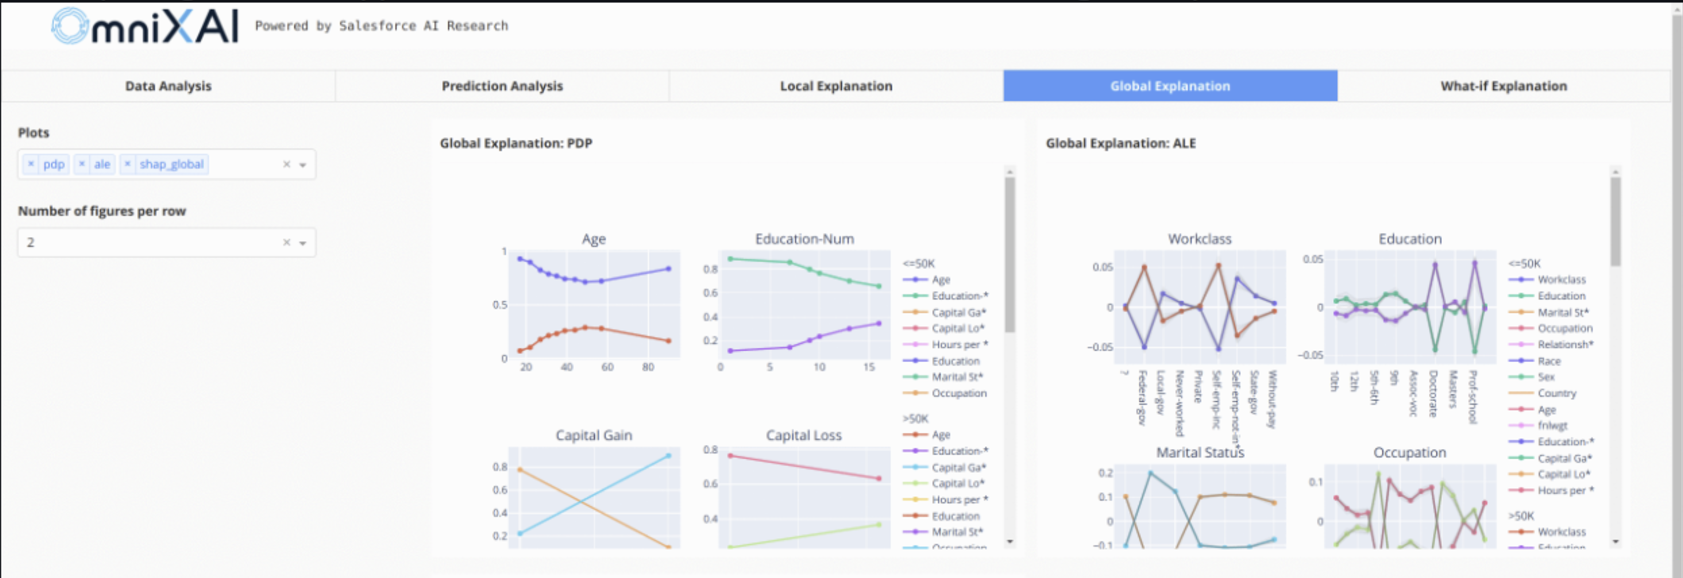

10. As it can be seen the dashboards look alike and most importantly it functions, but there is a problem with the What-if explanations that I wrote to the support about, aswell as many other problems that I encountered along the way

## My summary
OmniXAI is an amazing tool for explainable AI that has many bright sides, it works with many tools and it's easy to use....when it works. The drawbacks are that it's pretty tough to setup initially and it still has some problems and flaws but overall it's a great tool to try out and use. 

## References
[1] Yang, W., Le, H., Laud, T., Savarese, S., & Hoi, S. C. H. (2022, June 1). OmniXAI: a library for explainable AI. arXiv.org. https://arxiv.org/abs/2206.01612

[2] IBM (2024, August 15). What is explainable AI (XAI)? https://www.ibm.com/topics/explainable-ai#:~:text=Explainable%20AI%20is%20used%20to,putting%20AI%20models%20into%20production. 

[3] Awati, R., & Yasar, K. (2024b, October 16). What is black box AI? WhatIs. https://www.techtarget.com/whatis/definition/black-box-AI#:~:text=Black%20box%20AI%20is%20any,to%20how%20they%20were%20reached.

[4] Welcome to the SHAP documentation — SHAP latest documentation. (n.d.). https://shap.readthedocs.io/en/latest/

[5] Marcotcr. (n.d.). GitHub - marcotcr/lime: Lime: Explaining the predictions of any machine learning classifier. GitHub. https://github.com/marcotcr/lime

[6] Jacobgil. (n.d.). GitHub - jacobgil/pytorch-grad-cam: Advanced AI Explainability for computer vision.  Support for CNNs, Vision Transformers, Classification, Object detection, Segmentation, Image similarity and more. GitHub. https://github.com/jacobgil/pytorch-grad-cam

[7] ACEsuit. (n.d.). GitHub - ACEsuit/mace: MACE - Fast and accurate machine learning interatomic potentials with higher order equivariant message passing. GitHub. https://github.com/ACEsuit/mace

[8] Wu, T., Ribeiro, M. T., Heer, J., & Weld, D. S. (2021, January 1). Polyjuice: generating counterfactuals for explaining, evaluating, and improving models. arXiv.org. https://arxiv.org/abs/2101.00288